In [247]:
import pandas as pd
import numpy as np
import unicodedata
import datetime as dt
import io
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [248]:
# Download csv from MINSA
#url="https://cloud.minsa.gob.pe/s/Y8w3wHsEdYQSZRp/download"
#s=requests.get(url).content

data = pd.read_csv('positivos_covid.csv', sep=';', low_memory=False)
data.head()

,FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO
0,20210224,7320cabdc1aaca6c59014cae76a134e6,LAMBAYEQUE,FERREÑAFE,FERREÑAFE,PR,35.0,FEMENINO,20200329.0
1,20210224,e81602051997ace8340bb8c18fe24c65,LIMA,LIMA,CHORRILLOS,PR,36.0,MASCULINO,20200330.0
2,20210224,cecdbf10074dbc011ae05b3cbd320a6f,LIMA,LIMA,LIMA,PR,1.0,FEMENINO,20200330.0
3,20210224,71ecb6bccb248b0bb2ac72ed51b5e979,LIMA,LIMA,LIMA,PR,65.0,FEMENINO,20200330.0
4,20210224,566af4276cbe9359abe93f9aa86396c3,LIMA,LIMA,LIMA,PR,32.0,FEMENINO,20200330.0


In [249]:
data.FECHA_RESULTADO.max()

20210224.0

In [250]:
# Check dimension of dataset
print(data.shape)

(1308722, 9)


In [251]:
# Remove the  UUID column
data_clean = data.drop(columns=['UUID'], axis=1)

In [252]:
# check number of nulls
data.isnull().sum()

FECHA_CORTE           0
UUID                  0
DEPARTAMENTO          0
PROVINCIA             0
DISTRITO              0
METODODX              0
EDAD                298
SEXO                  0
FECHA_RESULTADO    2023
dtype: int64

In [253]:
# remove null values
data_clean = data_clean.dropna(subset=['FECHA_RESULTADO'])
data_clean = data_clean.dropna(subset=['EDAD'])
print(data_clean.isnull().sum())
data_clean.shape

FECHA_CORTE        0
DEPARTAMENTO       0
PROVINCIA          0
DISTRITO           0
METODODX           0
EDAD               0
SEXO               0
FECHA_RESULTADO    0
dtype: int64


(1306401, 8)

In [254]:
# format date in both columns
data_clean['FECHA_RESULTADO'] = data_clean['FECHA_RESULTADO'].apply(lambda x:str(x)[0:4] +
                                                                    '-' + str(x)[4:6] + 
                                                                    '-' + str(x)[6:8])
data_clean['FECHA_CORTE'] = data_clean['FECHA_CORTE'].apply(lambda x:str(x)[0:4] +
                                                                    '-' + str(x)[4:6] + 
                                                                    '-' + str(x)[6:8])

In [255]:
data_clean['FECHA_RESULTADO'] = pd.to_datetime(data_clean['FECHA_RESULTADO'], format='%Y-%m-%d')
data_clean.head()

,FECHA_CORTE,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO
0,2021-02-24,LAMBAYEQUE,FERREÑAFE,FERREÑAFE,PR,35.0,FEMENINO,2020-03-29
1,2021-02-24,LIMA,LIMA,CHORRILLOS,PR,36.0,MASCULINO,2020-03-30
2,2021-02-24,LIMA,LIMA,LIMA,PR,1.0,FEMENINO,2020-03-30
3,2021-02-24,LIMA,LIMA,LIMA,PR,65.0,FEMENINO,2020-03-30
4,2021-02-24,LIMA,LIMA,LIMA,PR,32.0,FEMENINO,2020-03-30


In [256]:
# Final dimension after cleaning
print(data_clean.shape)

(1306401, 8)


In [257]:
data_clean = data_clean.rename({'FECHA_RESULTADO':'DATE'}, axis = 1)
data_clean

,FECHA_CORTE,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,DATE
0,2021-02-24,LAMBAYEQUE,FERREÑAFE,FERREÑAFE,PR,35.0,FEMENINO,2020-03-29
1,2021-02-24,LIMA,LIMA,CHORRILLOS,PR,36.0,MASCULINO,2020-03-30
2,2021-02-24,LIMA,LIMA,LIMA,PR,1.0,FEMENINO,2020-03-30
3,2021-02-24,LIMA,LIMA,LIMA,PR,65.0,FEMENINO,2020-03-30
4,2021-02-24,LIMA,LIMA,LIMA,PR,32.0,FEMENINO,2020-03-30
...,...,...,...,...,...,...,...,...
1308717,2021-02-24,LIMA,LIMA,PUENTE PIEDRA,PCR,9.0,FEMENINO,2020-08-19
1308718,2021-02-24,LIMA,LIMA,SAN JUAN DE LURIGANCHO,PCR,9.0,FEMENINO,2020-08-20
1308719,2021-02-24,LIMA,EN INVESTIGACIÓN,EN INVESTIGACIÓN,PCR,9.0,FEMENINO,2020-08-27
1308720,2021-02-24,LIMA,EN INVESTIGACIÓN,EN INVESTIGACIÓN,PCR,7.0,FEMENINO,2020-09-04


## Group by day

In [258]:
df_group = data_clean.groupby(['DATE']).size().reset_index(name='COUNT')
df_group = df_group.set_index('DATE')
df_group.head()

,COUNT
DATE,
2020-03-06,1
2020-03-07,5
2020-03-08,2
2020-03-09,3
2020-03-10,1


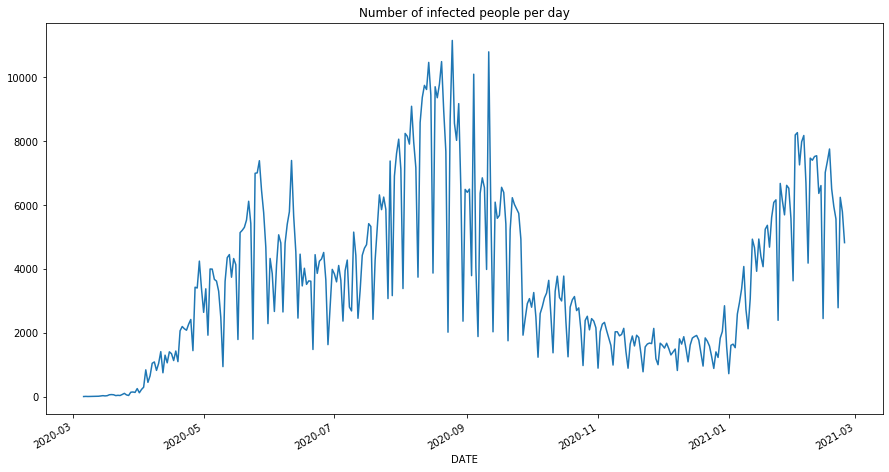

In [259]:
plt.figure(figsize=(15,8))
df_day = df_group['COUNT'].copy()
df_day.plot(title='Number of infected people per day')
plt.show()

## Group by week

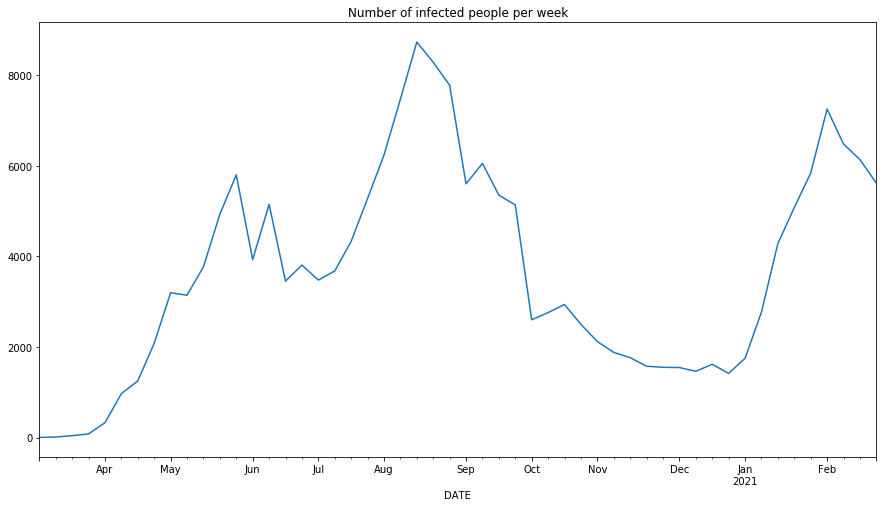

In [260]:
# resample over week (D)
freq = 'W'
# calculate the mean active power for a day
mean_week_df = df_day.resample(freq).mean()

# display the mean values
plt.figure(figsize=(15,8))
mean_week_df.plot(title='Number of infected people per week') 
plt.show();

## Group by month

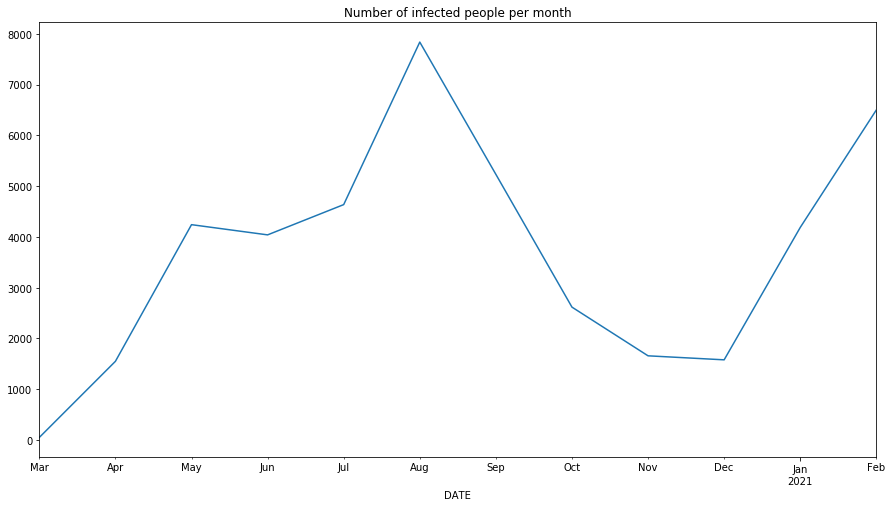

In [261]:
# resample over day (D)
freq = 'M'
# calculate the mean active power for a day
mean_month_df = df_day.resample(freq).mean()

# display the mean values
plt.figure(figsize=(15,8))
mean_month_df.plot(title='Number of infected people per month') 
plt.show();

## Create Time Series

In [262]:
data = df_day[0:7]
data.index[-1]
dt.datetime.strftime(data.index[-1], '%Y-%m-%d')

'2020-03-12'

In [263]:
def make_time_series(mean_power_df, weeks, freq='D', start_idx=0):
    '''Creates as many time series as there are complete years. This code
       accounts for the leap year, 2008.
      :param mean_power_df: A dataframe of global power consumption, averaged by day.
          This dataframe should also be indexed by a datetime.
      :param years: A list of years to make time series out of, ex. ['2007', '2008'].
      :param freq: The frequency of data recording (D = daily)
      :param start_idx: The starting dataframe index of the first point in the first time series.
          The default, 16, points to '2017-01-01'. 
      :return: A list of pd.Series(), time series data.
      '''
    
    # store time series
    time_series = []
    
    # store leap year in this dataset
    leap = '2008'

    # create time series for each year in years
    for i in range(len(weeks)):

        end_idx = start_idx+7

        # get global consumption data
        data = mean_power_df[start_idx:end_idx]
        # create start and end datetimes
        t_start = dt.datetime.strftime(data.index[0], '%Y-%m-%d') 
        t_end = dt.datetime.strftime(data.index[-1], '%Y-%m-%d')
        # create time series for the year
#        index = pd.DatetimeIndex(start=t_start, end=t_end, freq=freq)
        index = pd.date_range(start=t_start, end=t_end, freq=freq)
        time_series.append(pd.Series(data=data, index=index))
        
        start_idx = end_idx
    
    # return list of time series
    return time_series
    

In [264]:
full_years = np.arange(0,mean_week_df.shape[0]-1)
freq='D' # daily recordings

# make time series
time_series = make_time_series(df_day, full_years, freq=freq)
time_series

[2020-03-06    1
 2020-03-07    5
 2020-03-08    2
 2020-03-09    3
 2020-03-10    1
 2020-03-11    8
 2020-03-12    8
 Freq: D, Name: COUNT, dtype: int64,
 2020-03-13    10
 2020-03-14    19
 2020-03-15    28
 2020-03-16    20
 2020-03-17    27
 2020-03-18    56
 2020-03-19    62
 Freq: D, Name: COUNT, dtype: int64,
 2020-03-20     56
 2020-03-21     30
 2020-03-22     39
 2020-03-23     33
 2020-03-24     64
 2020-03-25    100
 2020-03-26     52
 Freq: D, Name: COUNT, dtype: int64,
 2020-03-27     34
 2020-03-28    136
 2020-03-29    143
 2020-03-30    130
 2020-03-31    250
 2020-04-01    118
 2020-04-02    222
 Freq: D, Name: COUNT, dtype: int64,
 2020-04-03     293
 2020-04-04     837
 2020-04-05     445
 2020-04-06     650
 2020-04-07    1043
 2020-04-08    1085
 2020-04-09     820
 Freq: D, Name: COUNT, dtype: int64,
 2020-04-10    1040
 2020-04-11    1408
 2020-04-12     745
 2020-04-13    1297
 2020-04-14    1057
 2020-04-15    1402
 2020-04-16    1343
 Freq: D, Name: COUNT, d

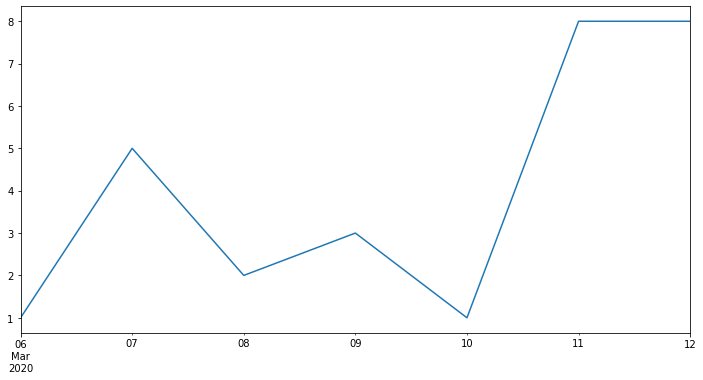

In [265]:
# display first time series
# First week
time_series_idx = 0

plt.figure(figsize=(12,6))
time_series[time_series_idx].plot()
plt.show()

## Splitting in Time

In [266]:
# create truncated, training time series
def create_training_series(complete_time_series, prediction_length):
    '''Given a complete list of time series data, create training time series.
       :param complete_time_series: A list of all complete time series.
       :param prediction_length: The number of points we want to predict.
       :return: A list of training time series.
       '''
    # get training series
    time_series_training = []
    
    for ts in complete_time_series:
        # truncate trailing 30 pts
        time_series_training.append(ts[:-prediction_length])
        
    return time_series_training

In [288]:
# test your code!

# set prediction length
prediction_length = 2 # 2 last weeks

time_series_training = time_series[0:-prediction_length]
time_series_training

[2020-03-06    1
 2020-03-07    5
 2020-03-08    2
 2020-03-09    3
 2020-03-10    1
 2020-03-11    8
 2020-03-12    8
 Freq: D, Name: COUNT, dtype: int64,
 2020-03-13    10
 2020-03-14    19
 2020-03-15    28
 2020-03-16    20
 2020-03-17    27
 2020-03-18    56
 2020-03-19    62
 Freq: D, Name: COUNT, dtype: int64,
 2020-03-20     56
 2020-03-21     30
 2020-03-22     39
 2020-03-23     33
 2020-03-24     64
 2020-03-25    100
 2020-03-26     52
 Freq: D, Name: COUNT, dtype: int64,
 2020-03-27     34
 2020-03-28    136
 2020-03-29    143
 2020-03-30    130
 2020-03-31    250
 2020-04-01    118
 2020-04-02    222
 Freq: D, Name: COUNT, dtype: int64,
 2020-04-03     293
 2020-04-04     837
 2020-04-05     445
 2020-04-06     650
 2020-04-07    1043
 2020-04-08    1085
 2020-04-09     820
 Freq: D, Name: COUNT, dtype: int64,
 2020-04-10    1040
 2020-04-11    1408
 2020-04-12     745
 2020-04-13    1297
 2020-04-14    1057
 2020-04-15    1402
 2020-04-16    1343
 Freq: D, Name: COUNT, d

### Training and Test Series

In [296]:
time_series[0]

2020-03-06    1
2020-03-07    5
2020-03-08    2
2020-03-09    3
2020-03-10    1
2020-03-11    8
2020-03-12    8
Freq: D, Name: COUNT, dtype: int64

In [297]:
training_series = df_day[0:-14]
testing_series = df_day[:]

In [317]:
testing_series

DATE
2020-03-06       1
2020-03-07       5
2020-03-08       2
2020-03-09       3
2020-03-10       1
              ... 
2021-02-20    5565
2021-02-21    2784
2021-02-22    6244
2021-02-23    5790
2021-02-24    4824
Name: COUNT, Length: 354, dtype: int64

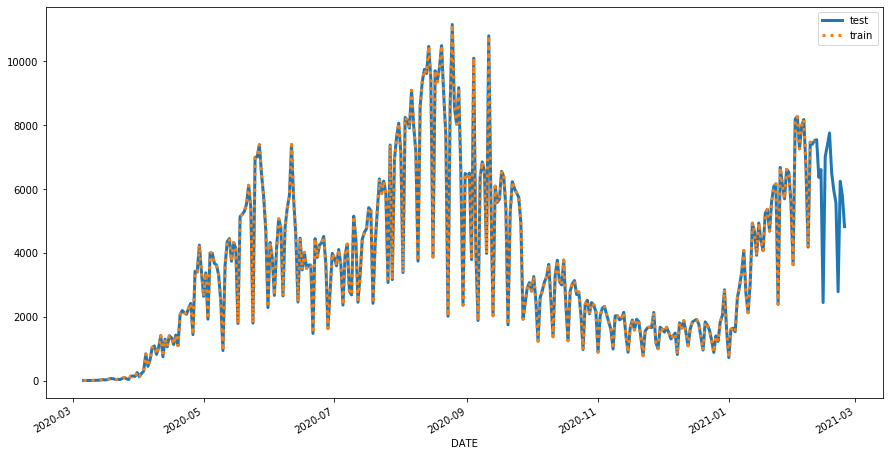

In [298]:
# display train/test time series
time_series_idx = 0

plt.figure(figsize=(15,8))
# test data is the whole time series
testing_series.plot(label='test', lw=3)
# train data is all but the last prediction pts
training_series.plot(label='train', ls=':', lw=3)

plt.legend()
plt.show()

## Convert to JSON

In [277]:
def series_to_json_obj(ts):
    '''Returns a dictionary of values in DeepAR, JSON format.
       :param ts: A single time series.
       :return: A dictionary of values with "start" and "target" keys.
       '''
    # get start time and target from the time series, ts
    json_obj = {"start": str(ts.index[0]), "target": list(ts)}
    return json_obj

In [301]:
# test out the code
ts = testing_series[0:7]

json_obj = series_to_json_obj(ts)

print(json_obj)

{'start': '2020-03-06 00:00:00', 'target': [1, 5, 2, 3, 1, 8, 8]}


## Saving Data, Locally

In [326]:
# import json for formatting data
import json
import os # and os for saving

def write_json_dataset(time_series, filename): 
    with open(filename, 'wb') as f:
        # for each of our times series, there is one JSON line
        for i in range(round(len(time_series)/7)):
            json_line = json.dumps(series_to_json_obj(time_series[i*7:i*7+7])) + '\n'
            json_line = json_line.encode('utf-8')
            f.write(json_line)
    print(filename + ' saved.')

In [327]:
# save this data to a local directory
data_dir = 'json_covid_data'

# make data dir, if it does not exist
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

In [328]:
# directories to save train/test data
train_key = os.path.join(data_dir, 'train.json')
test_key = os.path.join(data_dir, 'test.json')

# write train/test JSON files
write_json_dataset(training_series, train_key)        
write_json_dataset(testing_series, test_key)

json_energy_data/train.json saved.
json_energy_data/test.json saved.


## Uploading Data to S3

In [329]:
import boto3
import sagemaker
from sagemaker import get_execution_role

In [331]:
# session, role, bucket
sagemaker_session = sagemaker.Session()
role = get_execution_role()

bucket = sagemaker_session.default_bucket()

### EXERCISE: Upoad *both* training and test JSON 

In [ ]:
# general prefix
prefix='deepar-covid-consumption'

# *unique* train/test prefixes
train_prefix   = '{}/{}'.format(prefix, 'train')
test_prefix    = '{}/{}'.format(prefix, 'test')

# uploading data to S3, and saving locations
train_path  = sagemaker_session.upload_data(train_key, bucket=bucket, key_prefix=train_prefix)
test_path   = sagemaker_session.upload_data(test_key,  bucket=bucket, key_prefix=test_prefix)

In [ ]:
# check locations
print('Training data is stored in: '+ train_path)
print('Test data is stored in: '+ test_path)

## Training a DeepAR Estimator

In [ ]:
from sagemaker.amazon.amazon_estimator import get_image_uri

image_name = get_image_uri(boto3.Session().region_name, # get the region
                           'forecasting-deepar') # specify image

## Instantiate an Estimator

In [ ]:
from sagemaker.estimator import Estimator

# dir to save model artifacts
s3_output_path = "s3://{}/{}/output".format(bucket, prefix)

# instantiate a DeepAR estimator
estimator = Estimator(sagemaker_session=sagemaker_session,
                      image_name=image_name,
                      role=role,
                      train_instance_count=1,
                      train_instance_type='ml.c4.xlarge',
                      output_path=s3_output_path
                      )

## Setting Hyperparameters

In [ ]:
freq='D'
context_length=30 # same as prediction_length

hyperparameters = {
    "epochs": "50",
    "time_freq": freq,
    "prediction_length": str(prediction_length),
    "context_length": str(context_length),
    "num_cells": "50",
    "num_layers": "2",
    "mini_batch_size": "128",
    "learning_rate": "0.001",
    "early_stopping_patience": "10"
}

In [ ]:
# set the hyperparams
estimator.set_hyperparameters(**hyperparameters)

## Training Job

In [ ]:
%%time
# train and test channels
data_channels = {
    "train": train_path,
    "test": test_path
}

# fit the estimator
estimator.fit(inputs=data_channels)

## Deploy and Create a Predictor

In [ ]:
%%time

# create a predictor
predictor = estimator.deploy(
    initial_instance_count=1,
    instance_type='ml.t2.medium',
    content_type="application/json" # specify that it will accept/produce JSON
)

## Generating Predictions

In [ ]:
def json_predictor_input(input_ts, num_samples=50, quantiles=['0.1', '0.5', '0.9']):
    '''Accepts a list of input time series and produces a formatted input.
       :input_ts: An list of input time series.
       :num_samples: Number of samples to calculate metrics with.
       :quantiles: A list of quantiles to return in the predicted output.
       :return: The JSON-formatted input.
       '''
    # request data is made of JSON objects (instances)
    # and an output configuration that details the type of data/quantiles we want
    
    instances = []
    for k in range(len(input_ts)):
        # get JSON objects for input time series
        instances.append(series_to_json_obj(input_ts[k]))

    # specify the output quantiles and samples
    configuration = {"num_samples": num_samples, 
                     "output_types": ["quantiles"], 
                     "quantiles": quantiles}

    request_data = {"instances": instances, 
                    "configuration": configuration}

    json_request = json.dumps(request_data).encode('utf-8')
    
    return json_request

## Get Predictions

In [ ]:
# get all input and target (test) time series
input_ts = time_series_training
target_ts = time_series

# get formatted input time series
json_input_ts = json_predictor_input(input_ts)

# get the prediction from the predictor
json_prediction = predictor.predict(json_input_ts)

#print(json_prediction)

## Decoding Predictions

In [ ]:
# helper function to decode JSON prediction
def decode_prediction(prediction, encoding='utf-8'):
    '''Accepts a JSON prediction and returns a list of prediction data.
    '''
    prediction_data = json.loads(prediction.decode(encoding))
    prediction_list = []
    for k in range(len(prediction_data['predictions'])):
        prediction_list.append(pd.DataFrame(data=prediction_data['predictions'][k]['quantiles']))
    return prediction_list

In [ ]:
# get quantiles/predictions
prediction_list = decode_prediction(json_prediction)

# should get a list of 30 predictions 
# with corresponding quantile values
print(prediction_list[0])

## Display the Results!

In [ ]:
# display the prediction median against the actual data
def display_quantiles(prediction_list, target_ts=None):
    # show predictions for all input ts
    for k in range(len(prediction_list)):
        plt.figure(figsize=(12,6))
        # get the target month of data
        if target_ts is not None:
            target = target_ts[k][-prediction_length:]
            plt.plot(range(len(target)), target, label='target')
        # get the quantile values at 10 and 90%
        p10 = prediction_list[k]['0.1']
        p90 = prediction_list[k]['0.9']
        # fill the 80% confidence interval
        plt.fill_between(p10.index, p10, p90, color='y', alpha=0.5, label='80% confidence interval')
        # plot the median prediction line
        prediction_list[k]['0.5'].plot(label='prediction median')
        plt.legend()
        plt.show()

In [ ]:
# display predictions
display_quantiles(prediction_list, target_ts)

## Predicting the Future